# Projet AirBnB - Prétraitement des Données (Side Quest)
### Ce notebook a pour objectif de préparer le dataset pour la prédiction du prix d'un logement sur Airbnb.
### Il est structuré en plusieurs sections : chargement et exploration des données, prétraitement, et séparation des données pour une future modélisation.
### Chaque membre pourra compléter sa partie en fonction de son rôle.

 ## Table des Matières
### 1. Introduction
### 2. Chargement et Exploration des Données
### 3. Prétraitement des Données
###    - 3.1 Sélection des Colonnes Pertinentes
###    - 3.2 Suppression des Doublons
###    - 3.3 Gestion des Valeurs Manquantes
###    - 3.4 Conversion des Types de Données
###    - 3.5 Gestion des Valeurs Aberrantes
### 4. Séparation des Données (Train/Test Split)
### 5. Bonus: Préparation pour la Régression Linéaire
### 6. Conclusion et Perspectives


## 1. Introduction
### Dans ce projet, nous préparons le dataset AirBnB afin de prédire le prix des logements.
### Ce notebook se concentre sur la partie prétraitement des données avant l'application des algorithmes de prédiction.
### Chaque membre de l'équipe pourra ajouter des analyses ou des ajustements au fur et à mesure.


In [46]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import xgboost as xgb
from xgboost import XGBRegressor
import re

%matplotlib inline



 ## 2. Chargement et Exploration des Données
### Charger le fichier CSV et effectuer une première exploration du dataset.

In [47]:
# TODO: Remplacer le chemin par le chemin de votre fichier CSV si nécessaire
file_path = 'listings.csv.gz'
df = pd.read_csv(file_path)

# Affichage des premières lignes du dataset
#print(df.head())

# Informations générales sur le dataset
#print(df.info())

# Statistiques descriptives
df.describe()
# pd.set_option('display.max_columns', None)
#print(df.columns)


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.103100e+04,9.103100e+04,9.103100e+04,91022.000000,91022.000000,0.0,91031.000000,91031.000000,91031.000000,60114.000000,...,67167.000000,67157.000000,67166.000000,67158.000000,67156.000000,91031.000000,91031.000000,91031.000000,91031.000000,67176.000000
mean,6.081553e+17,2.024121e+13,1.818846e+08,30.396596,38.665465,NaN,48.864181,2.343099,3.229274,1.199737,...,4.656672,4.805165,4.827823,4.818905,4.624605,23.583010,22.522558,0.981808,0.019235,1.065495
std,5.127971e+17,3.728536e+01,2.006094e+08,127.009105,159.747472,NaN,0.018198,0.034228,1.667150,0.541934,...,0.455675,0.372354,0.361166,0.311784,0.441887,94.650167,93.227797,10.927202,0.335941,1.353293
min,3.109000e+03,2.024121e+13,2.626000e+03,0.000000,0.000000,NaN,48.816090,2.227420,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.233102e+07,2.024121e+13,1.956359e+07,1.000000,1.000000,NaN,48.850740,2.321011,2.000000,1.000000,...,4.500000,4.770000,4.800000,4.760000,4.500000,1.000000,1.000000,0.000000,0.000000,0.210000
50%,8.113895e+17,2.024121e+13,7.262684e+07,1.000000,2.000000,NaN,48.865470,2.346829,3.000000,1.000000,...,4.790000,4.920000,4.950000,4.920000,4.720000,1.000000,1.000000,0.000000,0.000000,0.590000
75%,1.092549e+18,2.024121e+13,3.394154e+08,3.000000,5.000000,NaN,48.879055,2.368320,4.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.900000,2.000000,2.000000,0.000000,0.000000,1.420000
max,1.305100e+18,2.024121e+13,6.654112e+08,7663.000000,8018.000000,NaN,48.901510,2.467120,16.000000,42.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,826.000000,826.000000,181.000000,11.000000,49.380000


 ## 3. Prétraitement des Données
### Dans cette section, nous allons préparer le dataset pour l'analyse.
### Cette partie est à compléter par les membres de l'équipe selon les besoins.

## 3.1 Sélection des Colonnes Pertinentes
### Sélectionner les colonnes jugées importantes pour la prédiction du prix.

In [48]:
colonnes_pertinentes = [
    'price',                 # Variable cible : le prix du logement
    'property_type',         # Type de propriété (appartement, maison, etc.)
    'room_type',             # Type de chambre (logement entier, chambre privée, etc.)
    'accommodates',          # Capacité d'accueil
    'bedrooms',              # Nombre de chambres
    'beds',                  # Nombre de lits (complément à 'bedrooms')
    'bathrooms_text',        # Informations sur le nombre de salles de bains (à nettoyer pour obtenir une valeur numérique)
    'amenities',             # Liste des équipements disponibles (peut justifier un prix plus élevé)
    'neighbourhood_cleansed',# Quartier du logement, déterminant pour la localisation
    'host_is_superhost',     # Statut de l'hôte, pouvant influencer la confiance et le prix
    'minimum_nights',        # Nombre minimum de nuits exigé pour la réservation
    'maximum_nights',        # Nombre maximum de nuits autorisé
    'availability_365',      # Disponibilité sur l'année, influençant la stratégie tarifaire
    'number_of_reviews',     # Nombre d'avis, reflète la popularité et la crédibilité du logement
    'review_scores_rating',  # Note globale basée sur les avis, indicateur de qualité
    'reviews_per_month',     # Fréquence des avis, complément d'information sur la popularité
    'instant_bookable'       # Possibilité de réserver instantanément, critère attractif pour les clients
]

df = df[colonnes_pertinentes]
df.head()

,price,property_type,room_type,accommodates,bedrooms,beds,bathrooms_text,amenities,neighbourhood_cleansed,host_is_superhost,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,instant_bookable
0,$100.00,Entire rental unit,Entire home/apt,2,1.0,1.0,1 bath,"[""Self check-in"", ""Hangers"", ""Children\u2019s ...",Observatoire,f,2,30,350,4,5.00,0.05,t
1,$88.00,Entire rental unit,Entire home/apt,2,0.0,1.0,1 bath,"[""Hot water kettle"", ""Hangers"", ""Heating"", ""Co...",Hôtel-de-Ville,NaN,3,730,77,425,4.62,2.26,f
2,$136.00,Entire rental unit,Entire home/apt,4,2.0,1.0,1 bath,"[""Hangers"", ""Coffee maker"", ""Heating"", ""Dryer""...",Hôtel-de-Ville,t,10,130,199,367,4.73,2.20,f
3,NaN,Entire rental unit,Entire home/apt,3,2.0,NaN,1 bath,"[""Hot water kettle"", ""Hangers"", ""Heating"", ""Co...",Opéra,f,7,365,0,5,4.80,0.03,f
4,$75.00,Entire rental unit,Entire home/apt,1,1.0,1.0,1 bath,"[""Heating"", ""Wifi"", ""Elevator"", ""Dedicated wor...",Louvre,f,180,360,358,0,NaN,NaN,f


## Colonnes Conservées :

**price** : C'est la variable à prédire, le prix du logement.

**property_type et room_type** : Elles décrivent la nature du logement (appartement, maison, chambre privée, etc.), ce qui a un impact direct sur le tarif.

**accommodates, bedrooms et beds** : Ces indicateurs de capacité et de confort permettent d’estimer la taille et la qualité du logement.

**bathrooms / bathrooms_text** : Ils renseignent sur le confort, en précisant le nombre de salles de bains.

**amenities** : La présence d’équipements (wifi, climatisation, etc.) peut justifier un prix plus élevé.

**neighbourhood_cleansed** : Ces informations de localisation sont essentielles pour tenir compte de l’emplacement, un facteur clé dans la tarification.

**host_is_superhost** : Un hôte reconnu peut influencer positivement le prix.

**minimum_nights, maximum_nights et availability_365** : Ces variables reflètent la politique de séjour et la disponibilité, pouvant influencer la stratégie tarifaire.

**number_of_reviews, review_scores_rating et reviews_per_month** : Les avis et notes donnent une indication sur la qualité perçue du logement et sa popularité, ce qui peut impacter le prix.

**instant_bookable** : Un logement facilement réservé peut être perçu comme plus attractif.

## Colonnes Écartées :

**id, listing_url, scrape_id, source** : Ce sont des identifiants ou des liens techniques sans rapport avec le prix.

**name, description, neighborhood_overview** : Champs textuels qui demanderaient un traitement avancé (NLP) pour être exploités.

**host_id, host_url, host_name, host_about, host_location, host_verifications, etc.** : Informations sur l’hôte qui, bien que pouvant être intéressantes pour une analyse plus poussée, n'apportent pas directement de valeur pour la prédiction du prix.

**picture_url, host_thumbnail_url, host_picture_url** : Liens vers des images, non exploitables sans traitement en vision par ordinateur.

**last_scraped, calendar_last_scraped, calendar_updated** : Dates techniques qui n’influencent pas directement le modèle de tarification.

**Variables redondantes ou dérivées (ex. : minimum_minimum_nights, maximum_minimum_nights, etc.)** : Elles fournissent des informations déjà couvertes par les colonnes principales comme minimum_nights et maximum_nights.

**Review scores détaillés (accuracy, cleanliness, checkin, communication, location, value)** : Nous utilisons la note globale review_scores_rating pour garder une vision synthétique.

**latitude et longitude** : Utilisées telles quelles, elles ne sont pas directement exploitables pour prédire le prix. En effet, ces coordonnées brutes nécessitent un prétraitement afin de fournir une information géographique plus pertinente.

## Raison de la sélection :
Nous avons retenu les colonnes qui fournissent des informations directement liées aux caractéristiques du logement, à sa localisation, au confort et à la réputation, car ce sont des facteurs déterminants pour fixer le prix. Les colonnes écartées sont soit des identifiants techniques, soit des données textuelles ou redondantes qui nécessiteraient un traitement supplémentaire pour être utiles dans une première approche.

Ce choix permet de concentrer l'analyse sur les variables ayant un impact immédiat sur le tarif, tout en simplifiant la préparation du dataset pour la modélisation.

## 3.2 Suppression des Doublons
### Identifier et supprimer les doublons dans le dataset.

In [49]:
colonnes_cles = [
    'price',                 # Variable cible : le prix du logement
    'property_type',         # Type de propriété (appartement, maison, etc.)
    'room_type',             # Type de chambre (logement entier, chambre privée, etc.)
    'accommodates',          # Capacité d'accueil
    'bedrooms',              # Nombre de chambres
    'beds',                  # Nombre de lits (complément à 'bedrooms')
    'bathrooms_text',        # Informations sur le nombre de salles de bains (à nettoyer pour obtenir une valeur numérique)
    'amenities',             # Liste des équipements disponibles (peut justifier un prix plus élevé)
    'neighbourhood_cleansed',# Quartier du logement, déterminant pour la localisation
    'host_is_superhost',     # Statut de l'hôte, pouvant influencer la confiance et le prix
    'minimum_nights',        # Nombre minimum de nuits exigé pour la réservation
    'maximum_nights',        # Nombre maximum de nuits autorisé
    'availability_365',      # Disponibilité sur l'année, influençant la stratégie tarifaire
    'number_of_reviews',     # Nombre d'avis, reflète la popularité et la crédibilité du logement
    'review_scores_rating',  # Note globale basée sur les avis, indicateur de qualité
    'reviews_per_month',     # Fréquence des avis, complément d'information sur la popularité
    'instant_bookable'       # Possibilité de réserver instantanément, critère attractif pour les clients
]
df_cleaned = df.drop_duplicates(subset=colonnes_cles, keep='first')

print("Doublons avant suppression :", df.duplicated(subset=colonnes_cles).sum())
print("Doublons après suppression :", df_cleaned.duplicated(subset=colonnes_cles).sum())

Doublons avant suppression : 203
Doublons après suppression : 0


## 3.3 Gestion des Valeurs Manquantes
### Identifier et traiter les valeurs manquantes.


In [50]:

df_cleaned = df_cleaned.copy()

# Nettoyage de la colonne 'price'
df_cleaned['price'] = df_cleaned['price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
df_cleaned['price'] = df_cleaned['price'].fillna(df_cleaned['price'].median())
# Gestion des valeurs manquantes
df_cleaned['neighbourhood_cleansed'] = df_cleaned['neighbourhood_cleansed'].fillna('Inconnu')
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].fillna(df_cleaned['accommodates'] // 2).astype(float)
df_cleaned['beds'] = df_cleaned['beds'].fillna(df_cleaned['bedrooms'] * 1.5).astype(float)
df_cleaned['bathrooms_text'] = df_cleaned['bathrooms_text'].fillna('Unknown')
df_cleaned['review_scores_rating'] = df_cleaned['review_scores_rating'].fillna(df_cleaned['review_scores_rating'].median())
df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].fillna('f')
df_cleaned['instant_bookable'] = df_cleaned['instant_bookable'].fillna('f')

df_cleaned['amenities'] = df_cleaned['amenities'].fillna('Unknown')
df_cleaned['reviews_per_month'] = df_cleaned['reviews_per_month'].fillna(0)
df_cleaned['number_of_reviews'] = df_cleaned['number_of_reviews'].fillna(0)
df_cleaned['minimum_nights'] = df_cleaned['minimum_nights'].fillna(df_cleaned['minimum_nights'].median())
df_cleaned['maximum_nights'] = df_cleaned['maximum_nights'].fillna(df_cleaned['maximum_nights'].median())
df_cleaned['availability_365'] = df_cleaned['availability_365'].fillna(df_cleaned['availability_365'].median())

# Vérification finale des valeurs manquantes
print("Valeurs manquantes après nettoyage :")
print(df_cleaned.isnull().sum())
df_cleaned.info()

Valeurs manquantes après nettoyage :
price                     0
property_type             0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
bathrooms_text            0
amenities                 0
neighbourhood_cleansed    0
host_is_superhost         0
minimum_nights            0
maximum_nights            0
availability_365          0
number_of_reviews         0
review_scores_rating      0
reviews_per_month         0
instant_bookable          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 90828 entries, 0 to 91030
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   90828 non-null  float64
 1   property_type           90828 non-null  object 
 2   room_type               90828 non-null  object 
 3   accommodates            90828 non-null  int64  
 4   bedrooms                90828 non-null  float64

 # 3.4 Conversion des Types de Données
### Convertir les colonnes en types appropriés, par exemple convertir 'price' en numérique.

In [ ]:
label_encoder = LabelEncoder()

# Encodage des variables catégoriques
df_cleaned['property_type_encoded'] = label_encoder.fit_transform(df_cleaned['property_type'])
df_cleaned['room_type_encoded'] = label_encoder.fit_transform(df_cleaned['room_type'])  # Déjà fait mais au cas où
df_cleaned['neighbourhood_encoded'] = label_encoder.fit_transform(df_cleaned['neighbourhood_cleansed'])

# Transformation des équipements en nombre d'équipements
df_cleaned['amenities_count'] = df_cleaned['amenities'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# Extraction du nombre de salles de bains
df_cleaned['bathrooms_count'] = df_cleaned['bathrooms_text'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else 0)

# Conversion des colonnes booléennes
df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].map({'t': True, 'f': False})
df_cleaned['instant_bookable'] = df_cleaned['instant_bookable'].map({'t': True, 'f': False})

# Suppression des colonnes inutiles après transformation
df_cleaned = df_cleaned.drop(columns=['property_type', 'room_type', 'neighbourhood_cleansed', 'bathrooms_text', 'amenities'])

# Vérification finale
print("Colonnes finales après conversion :")
print(df_cleaned.dtypes)

# correlation_matrix = df_cleaned[['price', 'instant_bookable']].corr()

# # Extraire le coefficient de corrélation entre les variables et le prix
# price_corr = correlation_matrix['price']
# print(price_corr.sort_values(ascending=False))


# 3.5 Gestion des Valeurs Aberrantes
### Détecter et gérer les valeurs aberrantes à l'aide de visualisations. 

price: Q1=121.0, Q3=187.0, IQR=66.0, lower_bound=10, upper_bound=1000
accommodates: Q1=2.0, Q3=4.0, IQR=2.0, lower_bound=0, upper_bound=8
bedrooms: Q1=1.0, Q3=2.0, IQR=1.0, lower_bound=0, upper_bound=6
beds: Q1=1.0, Q3=2.0, IQR=1.0, lower_bound=0, upper_bound=8
minimum_nights: Q1=2.0, Q3=5.0, IQR=3.0, lower_bound=1, upper_bound=14
maximum_nights: Q1=45.0, Q3=1125.0, IQR=1080.0, lower_bound=1, upper_bound=800
availability_365: Q1=0.0, Q3=267.0, IQR=267.0, lower_bound=0, upper_bound=365
number_of_reviews: Q1=0.0, Q3=22.0, IQR=22.0, lower_bound=0, upper_bound=1000
review_scores_rating: Q1=4.71, Q3=4.94, IQR=0.23000000000000043, lower_bound=0, upper_bound=5.285000000000001
reviews_per_month: Q1=0.0, Q3=1.04, IQR=1.04, lower_bound=0, upper_bound=10
amenities_count: Q1=13.0, Q3=35.0, IQR=22.0, lower_bound=0, upper_bound=68.0
bathrooms_count: Q1=1.0, Q3=1.0, IQR=0.0, lower_bound=0, upper_bound=4

Nombre de lignes contenant des outliers: 35189
Taille avant : (90828, 17)
Taille après suppressio

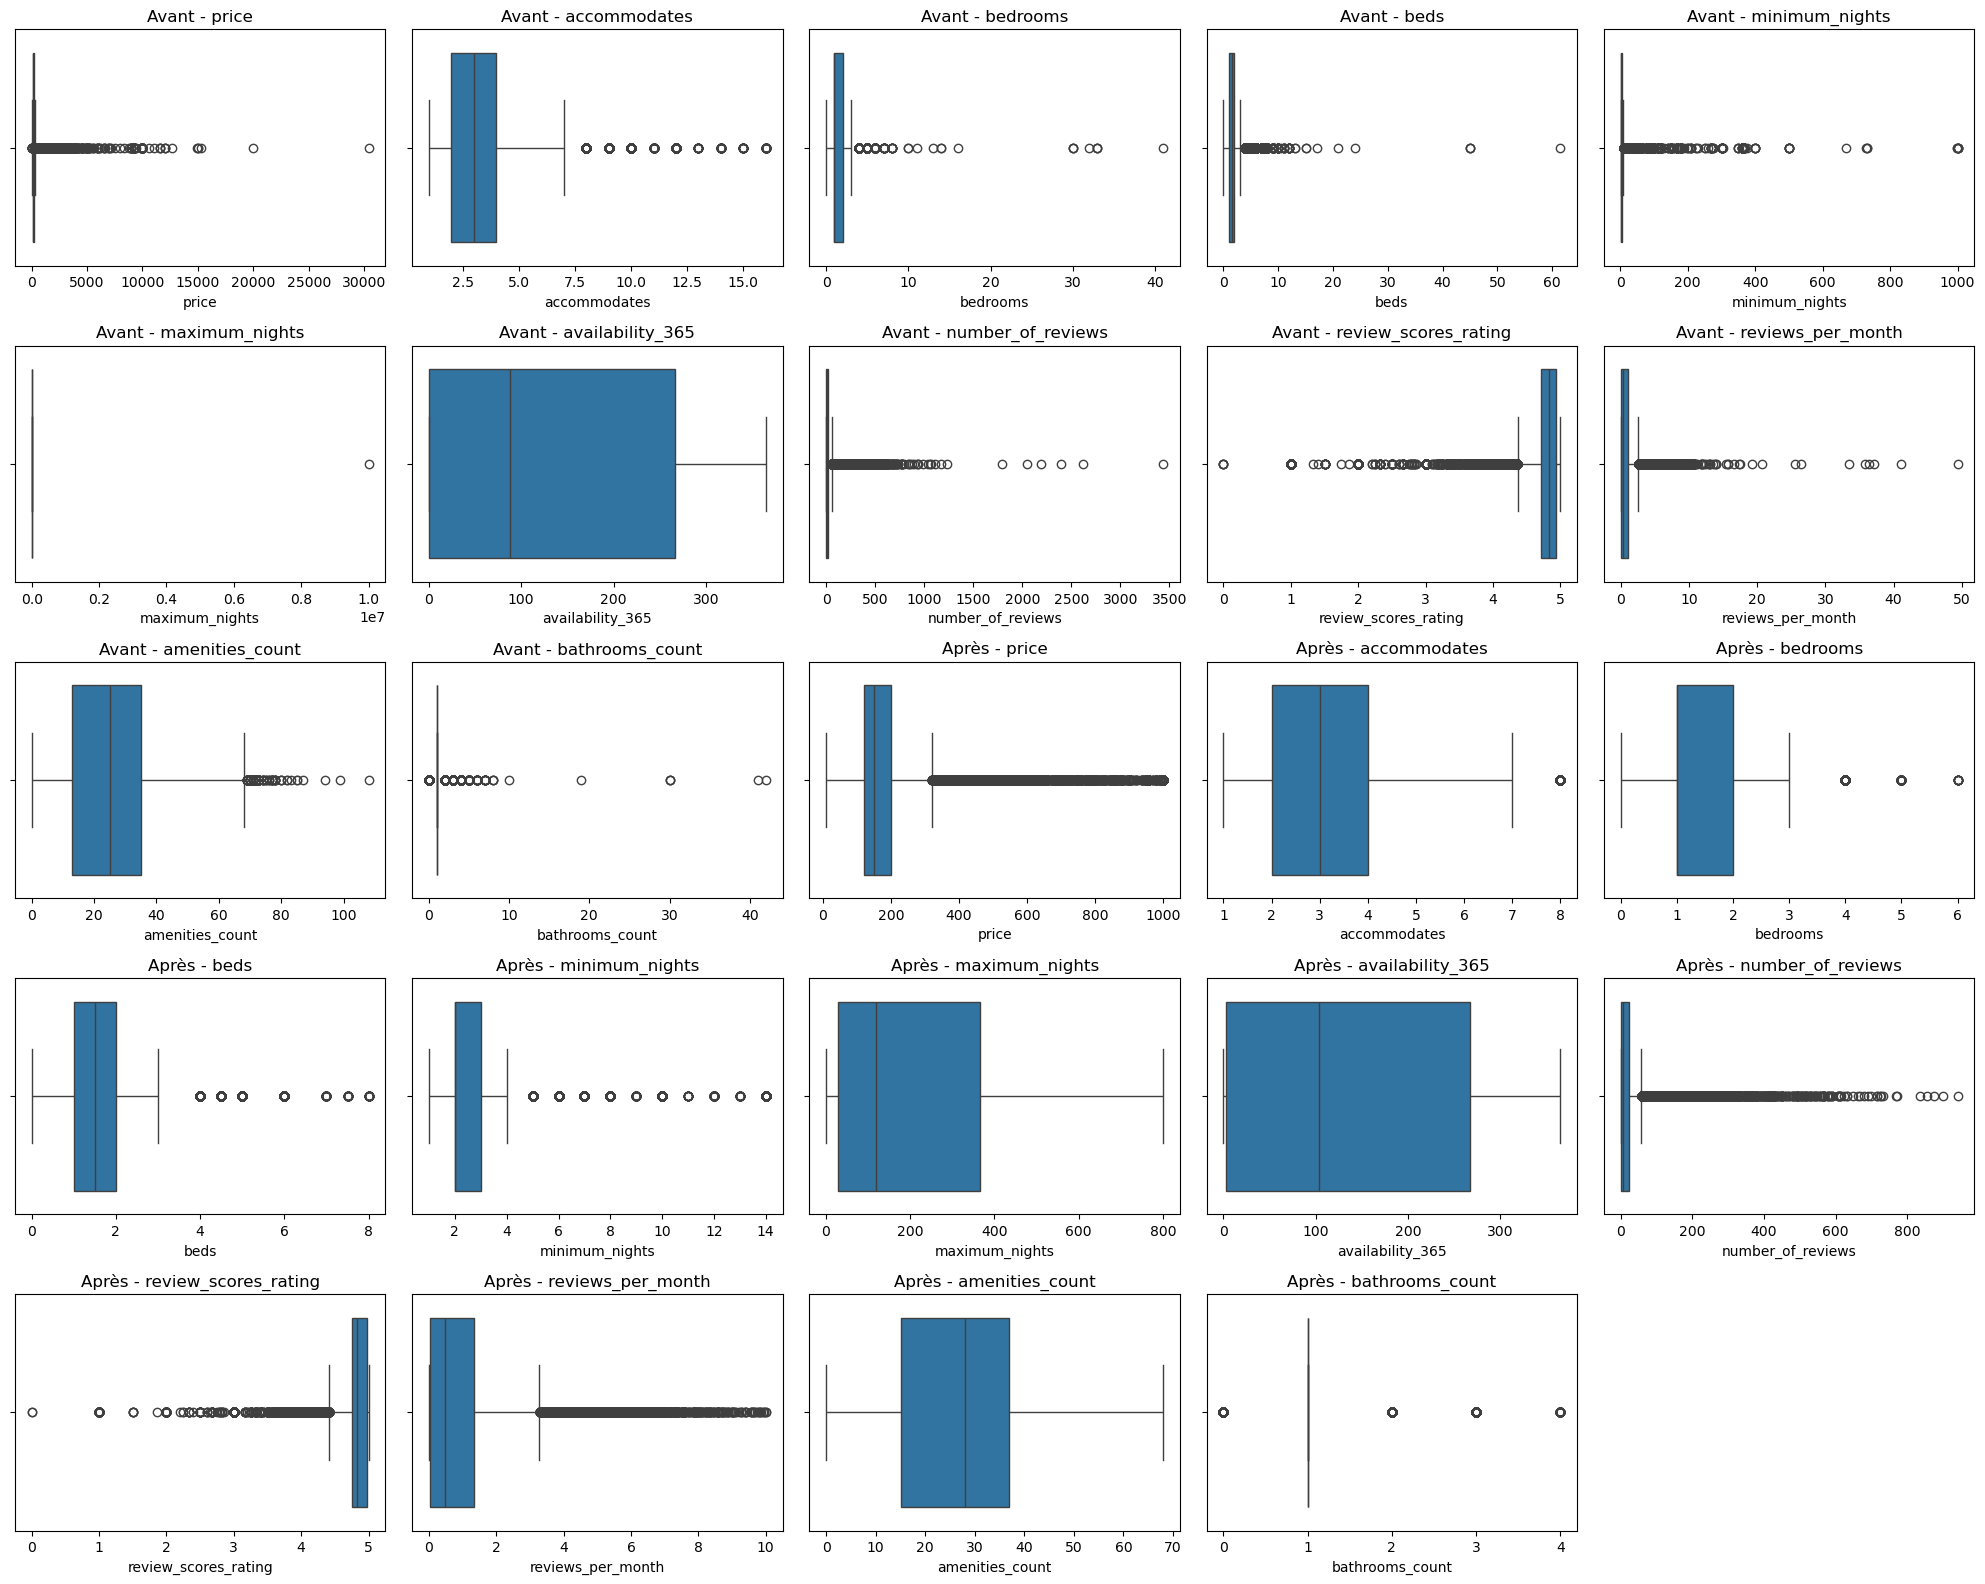

In [ ]:
# Liste des colonnes pertinentes
colonnes_pertinentes = [
    'price', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 
    'availability_365', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 
    'amenities_count', 'bathrooms_count'
]

def remove_outliers_iqr(df, columns):
    outliers = pd.DataFrame() 
    outliers_rows = []  # Liste pour stocker les indices des lignes contenant des outliers

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = max(Q1 - 1.5 * IQR, 0)  # Empêche les valeurs négatives
        upper_bound = Q3 + 1.5 * IQR

        # Conditions spécifiques pour chaque colonne
        if col == 'price':
            upper_bound = max(upper_bound, 1000)
            lower_bound = min(lower_bound, 10)
        elif col == 'bedrooms':
            upper_bound = max(upper_bound, 6)  # Limite max pour bedrooms
        elif col == 'accommodates':
            upper_bound = max(upper_bound, 8)  # Limite max pour accommodates
        elif col == 'beds':
            upper_bound = max(upper_bound, 8)  # Limite max pour beds
        elif col == 'minimum_nights':
            upper_bound = max(upper_bound, 14)  # Limite max pour minimum_nights
            lower_bound = max(lower_bound, 1)  # Limite min pour minimum_nights
        elif col == 'maximum_nights':
            upper_bound = min(upper_bound, 800)  # Limite max pour maximum_nights
            lower_bound = max(lower_bound, 1)  # Limite min pour maximum_nights
        elif col == 'availability_365':
            upper_bound = min(upper_bound, 365)  # Limite max pour availability_365
            lower_bound = max(lower_bound, 0)  # Limite min pour availability_365
        elif col == 'number_of_reviews':
            upper_bound = max(upper_bound, 1000)  # Limite max pour number_of_reviews
            lower_bound = min(lower_bound, 0)  # Limite min pour number_of_reviews
        elif col == 'review_scores_rating':
            upper_bound = max(upper_bound, 5)  # Limite max pour review_scores_rating
            lower_bound = min(lower_bound, 0)  # Limite min pour review_scores_rating
        elif col == 'reviews_per_month':
            upper_bound = max(upper_bound, 10)  # Limite max pour reviews_per_month
            lower_bound = min(lower_bound, 0)  # Limite min pour reviews_per_month
        elif col == 'bathrooms_count':
            upper_bound = max(upper_bound, 4)  # Limite max pour bathrooms_count
            lower_bound = min(lower_bound, 0)  # Limite min pour bathrooms_count

        # Identifier les outliers
        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_rows.extend(df[outliers[col]].index)
        
        print(f"{col}: Q1={Q1}, Q3={Q3}, IQR={IQR}, lower_bound={lower_bound}, upper_bound={upper_bound}")

    # Combinaison des outliers sur toutes les colonnes
    outliers_combined = outliers.any(axis=1)
    df_cleaned_no_outliers = df[~outliers_combined]

    print(f"\nNombre de lignes contenant des outliers: {len(set(outliers_rows))}")
    
    return df_cleaned_no_outliers, outliers_rows

# Appliquer la fonction sur le DataFrame (assurez-vous que df_cleaned est déjà chargé)
df_cleaned_no_outliers, outliers_rows = remove_outliers_iqr(df_cleaned, colonnes_pertinentes)
# Afficher la taille avant et après la suppression des outliers
print(f"Taille avant : {df_cleaned.shape}")
print(f"Taille après suppression des outliers : {df_cleaned_no_outliers.shape}")

# Statistiques avant suppression des outliers
print("\n📊 Statistiques avant suppression :")
print(df_cleaned[colonnes_pertinentes].describe())

# Statistiques après suppression des outliers
print("\n📊 Statistiques après suppression :")
print(df_cleaned_no_outliers[colonnes_pertinentes].describe())

# Visualisation avec boxplot avant et après la suppression des outliers
plt.figure(figsize=(20, 25))

# Adjust the layout to 5 rows and 4 columns to accommodate 17 subplots
rows, cols = 8, 5

# Boxplots avant suppression des outliers
for i, col in enumerate(colonnes_pertinentes, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f"Avant - {col}")

# Boxplots après suppression des outliers
for i, col in enumerate(colonnes_pertinentes, 1):
    plt.subplot(rows, cols, i + len(colonnes_pertinentes))
    sns.boxplot(data=df_cleaned_no_outliers, x=col)
    plt.title(f"Après - {col}")

plt.tight_layout()
plt.show()


# Prix en relation avec la note du bien

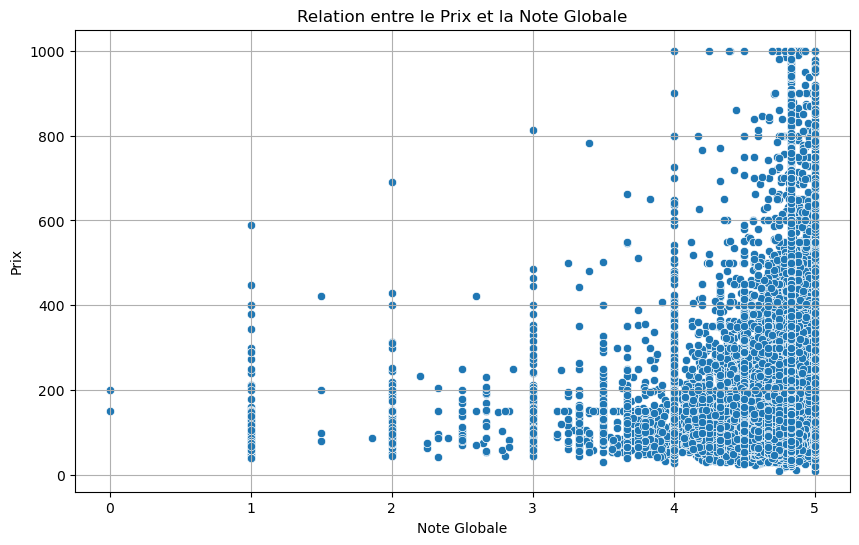

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_cleaned_no_outliers, x='review_scores_rating', y='price')

plt.title('Relation entre le Prix et la Note Globale')
plt.xlabel('Note Globale')
plt.ylabel('Prix')
plt.grid(True)
plt.show()

# Prix moyen par type de propriétés

   room_type_label       price
0  Entire home/apt  195.307332
1       Hotel room  107.281746
2     Private room  197.392405
3      Shared room  147.120267


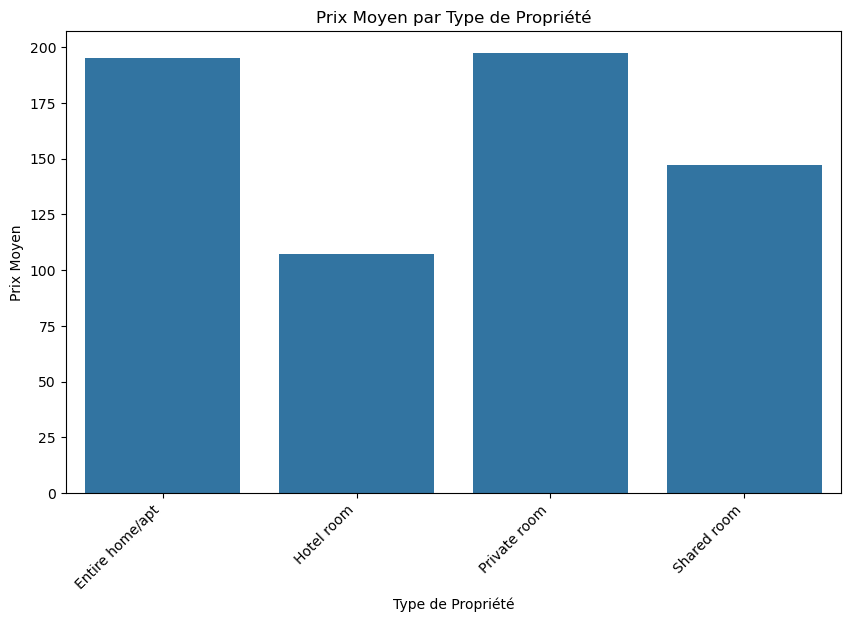

In [ ]:
df_cleaned_no_outliers = df_cleaned_no_outliers.copy()

room_type_map = {
    0: 'Entire home/apt',
    1: 'Private room',
    2: 'Shared room',
    3: 'Hotel room'
}

df_cleaned_no_outliers['room_type_label'] = df_cleaned_no_outliers['room_type_encoded'].map(room_type_map)

prix_moyen_par_type = df_cleaned_no_outliers.groupby('room_type_label')['price'].mean().reset_index()

print(prix_moyen_par_type)

plt.figure(figsize=(10, 6))
sns.barplot(data=prix_moyen_par_type, x='room_type_label', y='price')
plt.title('Prix Moyen par Type de Propriété')
plt.xlabel('Type de Propriété')
plt.ylabel('Prix Moyen')
plt.xticks(rotation=45, ha='right')
plt.show()


# Répartition des Logements Disponibles et Non Disponibles

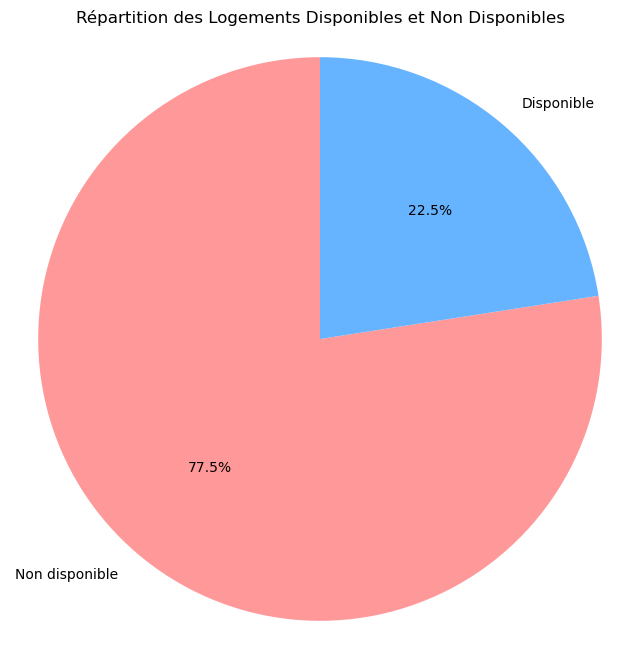

In [ ]:

disponibilite = df_cleaned_no_outliers['instant_bookable'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(disponibilite, labels=['Non disponible', 'Disponible'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
plt.title('Répartition des Logements Disponibles et Non Disponibles')
plt.axis('equal')
plt.show()


# 3.6 Normalisation des données
### Normalisation des données.  transformation des données pour qu'elles aient une moyenne de 0 et un écart-type de 1

In [ ]:
df_cleaned_no_outliers = df_cleaned_no_outliers.copy()
df_cleaned_no_outliers = df_cleaned_no_outliers.drop('room_type_label', axis=1)

# Liste de toutes les colonnes numériques
colonnes_numeriques = ['price', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 
                       'availability_365', 'number_of_reviews', 'review_scores_rating', 
                       'reviews_per_month', 'amenities_count', 'bathrooms_count']

# Appliquer la normalisation à toutes les colonnes numériques
scaler = StandardScaler()
df_cleaned_no_outliers[colonnes_numeriques] = scaler.fit_transform(df_cleaned_no_outliers[colonnes_numeriques])

# Vérifier les premières lignes après la normalisation
df_cleaned_no_outliers.head()


,price,accommodates,bedrooms,beds,host_is_superhost,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,instant_bookable,property_type_encoded,room_type_encoded,neighbourhood_encoded,amenities_count,bathrooms_count
0,-0.654755,-0.807632,-0.379518,-0.736939,False,-0.435804,-0.948169,1.596674,-0.383662,0.693103,-0.709973,True,17,0,10,-0.853804,-0.266753
1,-0.742195,-0.807632,-1.699351,-0.736939,False,0.118531,2.985438,-0.478967,8.341930,-0.485665,1.028875,False,17,0,6,0.782387,-0.266753
2,-0.392434,0.536364,0.940315,-0.736939,True,3.998875,-0.386225,0.448609,7.139830,-0.144443,0.981667,False,17,0,6,-0.142417,-0.266753
3,-0.290421,-0.135634,0.940315,1.136650,False,2.335870,0.934343,-1.064404,-0.362936,0.072699,-0.725709,False,17,0,11,1.209219,-0.266753
5,-0.290421,-0.807632,-0.379518,-0.736939,False,0.672866,-0.942550,0.836366,0.611180,0.444941,-0.466062,False,17,0,15,0.711248,-0.266753


 # 4. Séparation des Données (Train/Test Split)
### Préparer le dataset pour la modélisation en séparant les données en ensemble d'entraînement et de test.


In [ ]:
# Sélectionner les colonnes pour les features (variables indépendantes)
X = df_cleaned_no_outliers.drop(columns=['price'])  # On enlève la colonne 'price' qui est la cible

# Sélectionner la variable cible (target)
y = df_cleaned_no_outliers['price']

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Afficher les dimensions des ensembles train et test
print(f"Taille de l'ensemble d'entraînement : {X_train.shape} + {y_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape} + {y_test.shape}")

(55639, 16) (55639,)
Taille de l'ensemble d'entraînement : (38947, 16) + (38947,)
Taille de l'ensemble de test : (16692, 16) + (16692,)


# 5. Bonus: Préparation pour la Régression Linéaire
### Placeholder pour la future implémentation d'une régression linéaire.
### Cette section pourra être complétée ultérieurement avec la modélisation et l'évaluation.

In [ ]:
# Convertir toutes les colonnes en types numériques (float)
X_train_numeric = X_train.copy()
X_train_numeric = X_train_numeric.astype(float)

# Ajouter une constante pour le calcul du VIF
X_vif = add_constant(X_train_numeric)

# Calculer le VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


                 Variable        VIF
0                   const  39.853236
1            accommodates   2.904913
2                bedrooms   2.854598
3                    beds   2.728392
4       host_is_superhost   1.204579
5          minimum_nights   1.130423
6          maximum_nights   1.081320
7        availability_365   1.069516
8       number_of_reviews   1.359564
9    review_scores_rating   1.080748
10      reviews_per_month   1.509427
11       instant_bookable   1.165117
12  property_type_encoded   7.081842
13      room_type_encoded   7.063720
14  neighbourhood_encoded   1.005948
15        amenities_count   1.199751
16        bathrooms_count   1.459081


# Regression lineaire

In [ ]:
# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur l'ensemble des features
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) pour la régression linéaire : {mse}")
print(f"R² pour la régression linéaire : {r2}")
print(f"Intercept du modèle : {model.intercept_}")

print("\nCoefficients du modèle de régression linéaire :")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")


Erreur quadratique moyenne (MSE) pour la régression linéaire : 0.7088674736910171
R² pour la régression linéaire : 0.3075047756799687
Intercept du modèle : -0.3760254094009605

Coefficients du modèle de régression linéaire :
accommodates: 0.21879242717212372
bedrooms: 0.26349344542605063
beds: -0.14162518841432176
host_is_superhost: 0.06499184101184227
minimum_nights: -3.3342036124546504e-05
maximum_nights: 0.0009187987281831858
availability_365: 0.20128291823094924
number_of_reviews: -0.007491807779706275
review_scores_rating: 0.08721829275295143
reviews_per_month: -0.1704096974954985
instant_bookable: 0.014817056191628673
property_type_encoded: 0.016437427970333512
room_type_encoded: -0.2190745050676259
neighbourhood_encoded: 0.010246205481755324
amenities_count: 0.02451342656612223
bathrooms_count: 0.1506398703715155


# XGBoost

In [ ]:
# Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 5]
}

# Création du modèle XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print(f"\nMeilleurs paramètres pour XGBoost : {grid_search.best_params_}")

# Utilisation du meilleur modèle trouvé
best_model = grid_search.best_estimator_

# Prédictions avec le modèle optimisé
y_pred_xgb = best_model.predict(X_test)

# Évaluation du modèle
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Erreur quadratique moyenne (MSE) pour XGBoost après optimisation : {mse_xgb}")
print(f"R² pour XGBoost après optimisation : {r2_xgb}")

# Affichage de l'importance des caractéristiques
xgb.plot_importance(best_model, importance_type='weight')  # Vous pouvez aussi essayer 'gain' ou 'cover'
plt.title("Importance des caractéristiques (Poids)")
plt.show()


TypeError: Parameter grid for parameter 'colsample_bytree' needs to be a list or a numpy array, but got 0.8 (of type float) instead. Single values need to be wrapped in a list with one element.

# 6. Conclusion et Perspectives

### Ce notebook constitue la base du prétraitement des données pour le projet AirBnB.
### Chaque membre pourra ajuster ou compléter les sections selon l'évolution du projet.
### Pensez à ajouter des commentaires et des visualisations pertinentes pour documenter vos choix.